In [1]:
# Stock Market Data Analysis: Using Python to Scrape, Analyze, & Visualize Data from the S&P 500
# Import Packages (You may need to install, using pip)
# For further info on installing packages with Python visit: https://packaging.python.org/tutorials/installing-packages/

# If you want to pip install inline uncomment the following:
#!pip install pandas
#!pip install pandas_datareader
#!pip install mpl_finance
#!pip install mplfinance
#!pip install --upgrade mplfinance

# Import Packages
import bs4 as bs
import pickle
import requests
import datetime as dt
import os

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
#import pandas.plotting
from pandas.plotting import register_matplotlib_converters
#import pandas.testing
from pandas.testing import assert_frame_equal
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib import style

import mplfinance  
from mpl_finance import candlestick_ohlc # mpl_finance is deprecated - need to update visualizations  
from concurrent import futures

import collections
from collections import Counter

import sklearn
from sklearn import svm, neighbors
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

style.use('ggplot')

C:\Users\JCW\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\JCW\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [16]:
# Parts 1-3: Using Stock Market Data
# This example uses Tesla ($TSLA) stock data from 1/1/2000 to current date.
# df = pd.read_csv('c:/Users/JCW/Desktop/Stock_Market_Data_Analysis/Company Data/tsla.csv', parse_dates = True, index_col = 'Date')
start = dt.datetime(2000,1,1)
end = dt.datetime.now()
df = web.DataReader('TSLA', 'yahoo', start, end)

print(df.tail(10))

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-13  1794.989990  1471.109985  1659.000000  1497.060059  38985400   
2020-07-14  1590.000000  1431.000000  1556.000000  1516.800049  23418100   
2020-07-15  1550.000000  1457.000000  1543.000000  1546.010010  16367800   
2020-07-16  1531.709961  1466.000000  1477.160034  1500.640015  14300800   
2020-07-17  1537.510010  1490.000000  1513.449951  1500.839966   9330000   
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19344700   

              Adj Close  
Date                     
2020-07-13  1497.060059  
2020-07-1

In [17]:
# Read data into csv.
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')

# Moving average over 100 day period. You can alter the window to average over 30 days, or another time period.
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.dropna(inplace = True)
print(df.tail())

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19344700   

              Adj Close       100ma  
Date                                 
2020-07-20  1643.000000  833.681202  
2020-07-21  1568.359985  842.574802  
2020-07-22  1592.329956  851.818202  
2020-07-23  1513.069946  859.512701  
2020-07-24  1417.000000  866.227601  


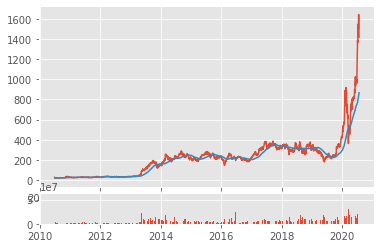

In [18]:
# Plot data using two plots (one for adjusted close price, one for volume).
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

# Volume is shown in the subplot as a bar chart, and adj close is a line graph. Red is actual
# price, and blue is the 100 moving average.
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [32]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)
print(df_ohlc.head())

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

        Date       open       high        low      close
0 2010-06-29  23.889999  23.889999  15.800000  17.459999
1 2010-07-09  17.400000  20.639999  17.049999  20.639999
2 2010-07-19  21.910000  21.910000  20.219999  20.719999
3 2010-07-29  20.350000  21.950001  19.590000  19.590000
4 2010-08-08  19.600000  19.600000  17.600000  19.150000
       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


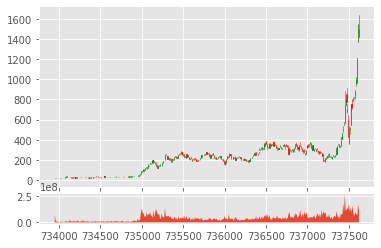

In [33]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-13  1794.989990  1471.109985  1659.000000  1497.060059  38985400   
2020-07-14  1590.000000  1431.000000  1556.000000  1516.800049  23418100   
2020-07-15  1550.000000  1457.000000  1543.000000  1546.010010  16367800   
2020-07-16  1531.709961  1466.000000  1477.160034  1500.640015  14300800   
2020-07-17  1537.510010  1490.000000  1513.449951  1500.839966   9330000   
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19344700   

              Adj Close       100ma  
Date                                 
2020-07-13 

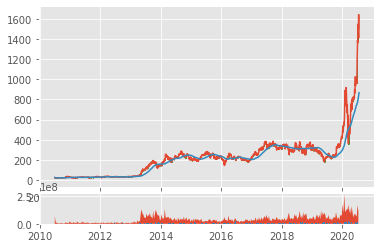

In [34]:
# Part 4: Resampling
# Here we are using a resampling method for the data sample to improve accuracy 
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
print(df.tail(10))

df_ohlc = df['Adj Close'].resample('10D').mean()

# Resample data for 10 day period
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)

# Convert datetime object to mdate
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 3, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
                 
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [35]:
# Part 5: Getting S&P500 List
# Here we are using BeautifulSoup to scrape data from wikipedia, and save the current S&P500 list.
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)

        #security = row.find_all('td')[1].text.strip()
        #tickers.append(security)

        #sector = row.find_all('td')[3].text.strip()
        #tickers.append(sector)

        #industry = row.find_all('td')[4].text.strip()
        #tickers.append(industry)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'

In [39]:
# Part 6: Getting Stock Prices
# Get data from Yahoo and call SP500 tickers list as sp500
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

# Take all of the data for stocks and store in a directory
# Working with API, parsing website, take entire dataset and store locally
# Here we will look at Adjusted Close, but we can look at other columns later
    if not os.path.exists('stock_dfs2'):
        os.makedirs('stock_dfs2')
    
    start = dt.datetime(2016,1,1)        
    end = dt.datetime.now()
    #end = dt.datetime(2020,7,24)

    # Grab all ticker data
    for ticker in tickers:
        print(ticker)    
        if not os.path.exists('stock_dfs2/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs2/{}.csv'.format(ticker))
            except:
                print(f'Problems retrieving data for {ticker}. Skipping!')
            else:
                print('Already have {}'.format(ticker))

get_data_from_yahoo()

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Already have AOS
APA
Already have APA
AIV
Already have AIV
AAPL
Alr

Already have PGR
PLD
Already have PLD
PRU
Already have PRU
PEG
Already have PEG
PSA
Already have PSA
PHM
Already have PHM
PVH
Already have PVH
QRVO
Already have QRVO
PWR
Already have PWR
QCOM
Already have QCOM
DGX
Already have DGX
RL
Already have RL
RJF
Already have RJF
RTX
Already have RTX
O
Already have O
REG
Already have REG
REGN
Already have REGN
RF
Already have RF
RSG
Already have RSG
RMD
Already have RMD
RHI
Already have RHI
ROK
Already have ROK
ROL
Already have ROL
ROP
Already have ROP
ROST
Already have ROST
RCL
Already have RCL
SPGI
Already have SPGI
CRM
Already have CRM
SBAC
Already have SBAC
SLB
Already have SLB
STX
Already have STX
SEE
Already have SEE
SRE
Already have SRE
NOW
Already have NOW
SHW
Already have SHW
SPG
Already have SPG
SWKS
Already have SWKS
SLG
Already have SLG
SNA
Already have SNA
SO
Already have SO
LUV
Already have LUV
SWK
Already have SWK
SBUX
Already have SBUX
STT
Already have STT
STE
Already have STE
SYK
Already have SYK
SIVB
Problems retrieving data fo

In [43]:
# Part 7: Combine S&P500 List with Adjusted Close Price for All Companies
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    mainDataSet = pd.DataFrame()

# Count in SP500 tickers list
    for count, ticker in enumerate(tickers):
        fileDataSet = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        fileDataSet.set_index('Date', inplace = True)
        fileDataSet.rename(columns = {'Adj Close':ticker}, inplace = True)
        fileDataSet.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)

        if mainDataSet.empty:
            mainDataSet = fileDataSet
        else:
            mainDataSet = mainDataSet.join(fileDataSet)
        print(mainDataSet.head())
        mainDataSet.to_csv('sp500_joined_closes.csv')
compile_data()  

                  MMM
Date                 
2000-01-03  28.311874
2000-01-04  27.186905
2000-01-05  27.974379
2000-01-06  30.224340
2000-01-07  30.824324
                  MMM       ABT
Date                           
2000-01-03  28.311874  6.564564
2000-01-04  27.186905  6.377004
2000-01-05  27.974379  6.365284
2000-01-06  30.224340  6.588011
2000-01-07  30.824324  6.658342
                  MMM       ABT  ABBV
Date                                 
2000-01-03  28.311874  6.564564   NaN
2000-01-04  27.186905  6.377004   NaN
2000-01-05  27.974379  6.365284   NaN
2000-01-06  30.224340  6.588011   NaN
2000-01-07  30.824324  6.658342   NaN
                  MMM       ABT  ABBV      ABMD
Date                                           
2000-01-03  28.311874  6.564564   NaN  18.25000
2000-01-04  27.186905  6.377004   NaN  17.81250
2000-01-05  27.974379  6.365284   NaN  18.00000
2000-01-06  30.224340  6.588011   NaN  18.03125
2000-01-07  30.824324  6.658342   NaN  17.93750
                  MM

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES       AFL          A        APD     AKAM  \
Date                                                                          
2000-01-03  15.500  NaN  28.294199  5.336146  44.777622  18.104057  321.250   
2000-01-04  14.625  NaN  27.172190  5.194542  41.357113  17.552309  300.000   
2000-01-05  15.000  NaN  27.464891  5.164732  38.791721  17.655748  283.500   
2000-01-06  16.000  NaN  27.684412  5.269069  37.314693  18.82821

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       ALK       ALB        ARE  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  7.803120  6.324813  15.185927   
2000-01-04  14.625  NaN  27.172190  ...  7.705581  6.324813  14.851833   
2000-01-05  15.000  NaN  27.464891  ...  7.747382  6.434619  14.578481   
2000-01-06  16.000  NaN  27.684412  ...  7.754352  6.654229  14.305137   
2000-01-07  16.2

[5 rows x 31 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  GOOGL  GOOG        MO     AMZN  AMCR  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...    NaN   NaN  1.819708  89.3750   NaN   
2000-01-04  14.625  NaN  27.172190  ...    NaN   NaN  1.834266  81.9375   NaN   
2000-01-05  15.000  NaN  27.464891  ...    NaN   NaN  1.824561  69.7500   NaN   
2000-01-06  16.000  NaN  27.68441

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AAL        AEP        AXP  \
Date                                ...                              
2000-01-03  15.500  NaN  28.294199  ...  NaN  12.473226  34.196667   
2000-01-04  14.625  NaN  27.172190  ...  NaN  12.622015  32.905453   
2000-01-05  15.000  NaN  27.464891  ...  NaN  13.093165  32.186031   
2000-01-06  16.000  NaN  27.684412  ...  NaN  13.167562  32.841770   
2000-01-07  16.250  NaN  28.221029  ... 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AMP       ABC       AME       AMGN  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  3.107706  1.857676  50.853237   
2000-01-04  14.625  NaN  27.172190  ...  NaN  2.895534  1.851566  46.964756   
2000-01-05  15.000  NaN  27.464891  ...  NaN  3.120188  1.869898  48.580750   
2000-01-06  16.000  NaN  27.684412  ...  NaN  3.357322  1.857676 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      ANSS  ANTM        AON       AOS  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  2.765625   NaN  27.607428  0.643602   
2000-01-04  14.625  NaN  27.172190  ...  2.687500   NaN  26.988020  0.634328   
2000-01-05  15.000  NaN  27.464891  ...  2.703125   NaN  27.784399  0.632473   
2000-01-06  16.000  NaN  27.684412  ...  2.703125   NaN  28.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      AAPL       AMAT  APTV       ADM  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  3.460857  24.005121   NaN  7.004237   
2000-01-04  14.625  NaN  27.172190  ...  3.169071  22.819094   NaN  6.931280   
2000-01-05  15.000  NaN  27.464891  ...  3.215448  21.965160   NaN  6.821836   
2000-01-06  16.000  NaN  27.684412  ...  2.937188  22.000732

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AIZ          T       ATO      ADSK  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  17.282593  8.780582  8.052903   
2000-01-04  14.625  NaN  27.172190  ...  NaN  16.271378  8.561753  7.660817   
2000-01-05  15.000  NaN  27.464891  ...  NaN  16.524181  8.835291  7.178246   
2000-01-06  16.000  NaN  27.684412  ...  NaN  16.175280  8.698522

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        AVB        AVY        BKR  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  15.067223  41.993992  10.526615   
2000-01-04  14.625  NaN  27.172190  ...  14.734252  41.442417  10.526615   
2000-01-05  15.000  NaN  27.464891  ...  14.872992  42.802998  10.591587   
2000-01-06  16.000  NaN  27.684412  ...  15.372456  44.310669  11.598760   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        BDX  BRK.B        BBY  BIO  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  19.089441    NaN  18.150681  NaN   
2000-01-04  14.625  NaN  27.172190  ...  18.588293    NaN  18.032827  NaN   
2000-01-05  15.000  NaN  27.464891  ...  18.724966    NaN  17.914955  NaN   
2000-01-06  16.000  NaN  27.684412  ...  19.499475    NaN  17.757807  NaN  

[5 rows x 80 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         BA     BKNG       BWA  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  25.741438  307.500  2.292869   
2000-01-04  14.625  NaN  27.172190  ...  25.701408  324.000  2.292869   
2000-01-05  15.000  NaN  27.464891  ...  27.302753  359.625  2.303982   
2000-01-06  16.000  NaN  27.684412  ...  27.582977  345.000  2.274348   


                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AVGO  BR      BF.B      CHRW  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...   NaN NaN  1.056217  6.855355   
2000-01-04  14.625  NaN  27.172190  ...   NaN NaN  1.036743  6.625382   
2000-01-05  15.000  NaN  27.464891  ...   NaN NaN  1.044762  6.537773   
2000-01-06  16.000  NaN  27.684412  ...   NaN NaN  1.051635  6.570628   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        COF        CAH      KMX  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  36.145565  16.953266  1.12500   
2000-01-04  14.625  NaN  27.172190  ...  33.895641  16.759890  1.09375   
2000-01-05  15.000  NaN  27.464891  ...  33.113079  17.941675  1.06250   
2000-01-06  16.000  NaN  27.684412  ...  34.629311  18.564796  1.12500   
2000-01-07  16.2

[5 rows x 99 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CBOE  CBRE  CDW  CE  CNC       CNP  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...   NaN   NaN  NaN NaN  NaN  6.079404   
2000-01-04  14.625  NaN  27.172190  ...   NaN   NaN  NaN NaN  NaN  6.147709   
2000-01-05  15.000  NaN  27.464891  ...   NaN   NaN  NaN NaN  NaN  6.403867   
2000-01-06  16.000  NaN  27.684412  ...   N

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       SCHW  CHTR        CVX  CMG  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  20.056469   NaN  17.167484  NaN   
2000-01-04  14.625  NaN  27.172190  ...  19.785444   NaN  17.167484  NaN   
2000-01-05  15.000  NaN  27.464891  ...  19.920959   NaN  17.475414  NaN   
2000-01-06  16.000  NaN  27.684412  ...  19.920959   NaN  18.219591  NaN   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         CI       CINF       CTAS  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  23.584595  13.659487  27.019138   
2000-01-04  14.625  NaN  27.172190  ...  23.490625  13.645506  25.920277   
2000-01-05  15.000  NaN  27.464891  ...  23.396673  13.785316  26.211151   
2000-01-06  16.000  NaN  27.684412  ...  24.524212  13.869204  26.356592   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CFG       CTXS        CLX  CME  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  49.982899  28.627275  NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  47.520329  27.863398  NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  44.789551  28.590889  NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  40.961594  28.845522  NaN   
2000-01-07

[5 rows x 124 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         KO      CTSH         CL  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  12.015392  1.922517  20.230127   
2000-01-04  14.625  NaN  27.172190  ...  12.028710  1.857432  19.702030   
2000-01-05  15.000  NaN  27.464891  ...  12.135282  1.960066  19.031754   
2000-01-06  16.000  NaN  27.684412  ...  12.148600  1.859935  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         ED       STZ        COO  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  12.767960  5.836346  14.346992   
2000-01-04  14.625  NaN  27.172190  ...  12.933472  5.616660  14.468577   
2000-01-05  15.000  NaN  27.464891  ...  13.524576  5.807055  14.559765   
2000-01-06  16.000  NaN  27.684412  ...  13.548223  6.034063  14.559765   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        CVS       DHI       DHR  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  13.832482  2.559436  5.401667   
2000-01-04  14.625  NaN  27.172190  ...  13.718168  2.462853  5.205636   
2000-01-05  15.000  NaN  27.464891  ...  14.472672  2.499073  5.263720   
2000-01-06  16.000  NaN  27.684412  ...  13.443807  2.366271  5.321804   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  DAL      XRAY        DVN  DXCM  FANG  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  NaN  6.954667  13.206322   NaN   NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  6.954667  12.925879   NaN   NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  7.074894  13.155335   NaN   NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  7.084142 

[5 rows x 155 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  DFS  DISCA  DISCK       DISH  DG  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  NaN    NaN    NaN  33.913342 NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN    NaN    NaN  32.666359 NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN    NaN    NaN  32.555019 NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN    NaN 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        DTE        DUK       DRE  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  12.050096  21.758743  6.057658   
2000-01-04  14.625  NaN  27.172190  ...  12.075153  22.096954  6.017806   
2000-01-05  15.000  NaN  27.464891  ...  12.450941  22.998890  6.037733   
2000-01-06  16.000  NaN  27.684412  ...  12.400831  23.618952  6.177219   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       EMN       ETN      EBAY  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  7.776294  2.688206  7.287086   
2000-01-04  14.625  NaN  27.172190  ...  7.587906  2.596401  6.603519   
2000-01-05  15.000  NaN  27.464891  ...  7.964685  2.617585  7.045258   
2000-01-06  16.000  NaN  27.684412  ...  8.467057  2.671727  6.958200   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  EOG        EFX  EQIX       EQR  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  10.907270   NaN  7.484406   
2000-01-04  14.625  NaN  27.172190  ...  NaN  10.541660   NaN  7.428960   
2000-01-05  15.000  NaN  27.464891  ...  NaN  10.419790   NaN  7.584192   
2000-01-06  16.000  NaN  27.684412  ...  NaN  10.297920   NaN  7.661807   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  EXPE      EXPD  EXR        XOM  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...   NaN  8.927643  NaN  21.139345   
2000-01-04  14.625  NaN  27.172190  ...   NaN  8.779065  NaN  20.734442   
2000-01-05  15.000  NaN  27.464891  ...   NaN  8.804903  NaN  21.864794   
2000-01-06  16.000  NaN  27.684412  ...   NaN  8.850121  NaN  22.995153   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      FAST       FRT        FDX  FIS  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  1.851905  7.809035  38.223751  NaN   
2000-01-04  14.625  NaN  27.172190  ...  1.745536  7.783094  36.944042  NaN   
2000-01-05  15.000  NaN  27.464891  ...  1.819176  7.757147  37.778625  NaN   
2000-01-06  16.000  NaN  27.684412  ...  1.819176  7.990644  42.0

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      FLIR       FLS       FMC  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  1.847155  4.583350  4.771420   
2000-01-04  14.625  NaN  27.172190  ...  1.702415  4.496214  4.711777   
2000-01-05  15.000  NaN  27.464891  ...  1.792016  4.565925  4.798528   
2000-01-06  16.000  NaN  27.684412  ...  1.778232  4.583350  4.793107   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       BEN       FCX        GPS  GRMN  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  6.348482  5.760734  27.622633   NaN   
2000-01-04  14.625  NaN  27.172190  ...  6.235785  5.437866  26.621805   NaN   
2000-01-05  15.000  NaN  27.464891  ...  6.335961  5.641784  25.460854   NaN   
2000-01-06  16.000  NaN  27.684412  ...  6.724130  5.471850 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  GM        GPC      GILD        GL  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.294199  ... NaN  12.215413  1.527291  8.717456   
2000-01-04  14.625  NaN  27.172190  ... NaN  12.088499  1.457792  8.544263   
2000-01-05  15.000  NaN  27.464891  ... NaN  12.025039  1.445926  8.607070   
2000-01-06  16.000  NaN  27.684412  ... NaN  12.025039  1.544242  8.58

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        HAL  HBI        HIG        HAS  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  12.328655  NaN  29.600504  11.565478   
2000-01-04  14.625  NaN  27.172190  ...  12.388980  NaN  28.619247  10.820583   
2000-01-05  15.000  NaN  27.464891  ...  11.845963  NaN  27.760685  10.310920   
2000-01-06  16.000  NaN  27.684412  ...  12.328655  NaN

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  HPE  HLT       HFC      HOLX  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  NaN  NaN  0.082275  1.500000   
2000-01-04  14.625  NaN  27.172190  ...  NaN  NaN  0.083030  1.421875   
2000-01-05  15.000  NaN  27.464891  ...  NaN  NaN  0.084162  1.500000   
2000-01-06  16.000  NaN  27.684412  ...  NaN  NaN  0.083030  1.484375   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  HWM        HPQ       HUM       HBAN  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  NaN  10.766153  6.980583  10.218407   
2000-01-04  14.625  NaN  27.172190  ...  NaN   9.952532  7.038273   9.905304   
2000-01-05  15.000  NaN  27.464891  ...  NaN   9.889507  7.211346   9.649134   
2000-01-06  16.000  NaN  27.684412  ...  NaN   9.259240  7.4

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  ILMN       INCY  IR       INTC  ICE  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...   NaN  44.828125 NaN  27.719835  NaN   
2000-01-04  14.625  NaN  27.172190  ...   NaN  46.625000 NaN  26.425453  NaN   
2000-01-05  15.000  NaN  27.464891  ...   NaN  42.984375 NaN  26.644501  NaN   
2000-01-06  16.000  NaN  27.684412  ...   NaN  41.656250 NaN

[5 rows x 266 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  ISRG        IVZ  IPGP  IQV       IRM  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...   NaN  11.922708   NaN  NaN  5.058746   
2000-01-04  14.625  NaN  27.172190  ...   NaN  11.722219   NaN  NaN  4.899275   
2000-01-05  15.000  NaN  27.464891  ...   NaN  11.227665   NaN  NaN  4.739805   
2000-01-06  16.000  NaN  27.6844

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        SJM        JNJ        JCI  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  10.413020  26.779993  28.140066   
2000-01-04  14.625  NaN  27.172190  ...  10.276905  25.799568  26.749308   
2000-01-05  15.000  NaN  27.464891  ...  10.208840  26.071909  26.332069   
2000-01-06  16.000  NaN  27.684412  ...  10.413020  26.888935  26.053923   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        KSU          K        KEY  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  65.806404  16.248468  10.688341   
2000-01-04  14.625  NaN  27.172190  ...  62.422760  15.670599  10.559573   
2000-01-05  15.000  NaN  27.464891  ...  60.497585  15.534624  10.366411   
2000-01-06  16.000  NaN  27.684412  ...  62.422760  15.670599  10.752731   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        KSS  KHC        KR        LB  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  23.710402  NaN  6.489871  7.874387   
2000-01-04  14.625  NaN  27.172190  ...  23.428648  NaN  6.704060  7.716657   
2000-01-05  15.000  NaN  27.464891  ...  23.753748  NaN  6.811152  7.607459   
2000-01-06  16.000  NaN  27.684412  ...  24.512300  NaN  6.554132

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  LVS        LEG  LDOS       LEN  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  10.075068   NaN  5.978436   
2000-01-04  14.625  NaN  27.172190  ...  NaN   9.554474   NaN  5.931546   
2000-01-05  15.000  NaN  27.464891  ...  NaN   9.554474   NaN  5.954991   
2000-01-06  16.000  NaN  27.684412  ...  NaN   9.523849   NaN  5.954991   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  LKQ        LMT         L        LOW  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  NaN  12.144202  8.329817  10.516467   
2000-01-04  14.625  NaN  27.172190  ...  NaN  12.556508  8.276928   9.950560   
2000-01-05  15.000  NaN  27.464891  ...  NaN  12.631470  8.224044   9.938770   
2000-01-06  16.000  NaN  27.684412  ...  NaN  12.818884  8.1

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  MKTX        MAR        MMC  \
Date                                ...                               
2000-01-03  15.500  NaN  28.294199  ...   NaN  11.590939  26.990477   
2000-01-04  14.625  NaN  27.172190  ...   NaN  11.519688  25.777422   
2000-01-05  15.000  NaN  27.464891  ...   NaN  11.709705  24.849794   
2000-01-06  16.000  NaN  27.684412  ...   NaN  11.875965  26.659546   
2000-01-07  16.250  NaN  28.221029

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       MXIM        MCD        MCK  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  29.275034  23.817707  19.955185   
2000-01-04  14.625  NaN  27.172190  ...  28.193531  23.329338  18.678059   
2000-01-05  15.000  NaN  27.464891  ...  28.268124  23.705008  18.890911   
2000-01-06  16.000  NaN  27.684412  ...  29.051296  23.366909  20.221256   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       MCHP        MU       MSFT  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  12.186379  37.96875  37.289700   
2000-01-04  14.625  NaN  27.172190  ...  11.311924  36.50000  36.030037   
2000-01-05  15.000  NaN  27.464891  ...  11.401610  36.37500  36.409924   
2000-01-06  16.000  NaN  27.684412  ...  11.098914  37.00000  35.190277   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       MCO         MS        MOS  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  8.182575  38.990582  13.199550   
2000-01-04  14.625  NaN  27.172190  ...  7.946084  36.102390  12.904040   
2000-01-05  15.000  NaN  27.464891  ...  7.804188  34.784649  13.396564   
2000-01-06  16.000  NaN  27.684412  ...  7.804188  35.452534  13.593571   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  NDAQ       NOV       NTAP  NFLX  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...   NaN  5.681176  36.342716   NaN   
2000-01-04  14.625  NaN  27.172190  ...   NaN  5.535507  31.746449   NaN   
2000-01-05  15.000  NaN  27.464891  ...   NaN  5.632619  33.510132   NaN   
2000-01-06  16.000  NaN  27.684412  ...   NaN  5.851126  29.956018   NaN   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       NEE  NLSN       NKE        NI  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  8.322881   NaN  1.819597  2.819523   
2000-01-04  14.625  NaN  27.172190  ...  8.474204   NaN  1.720346  2.849518   
2000-01-05  15.000  NaN  27.464891  ...  8.751637   NaN  1.819597  2.969497   
2000-01-06  16.000  NaN  27.684412  ...  8.751637   NaN  1.810144

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  NLOK  NCLH  NRG       NUE      NVDA  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...   NaN   NaN  NaN  6.318145  3.590438   
2000-01-04  14.625  NaN  27.172190  ...   NaN   NaN  NaN  6.252708  3.494565   
2000-01-05  15.000  NaN  27.464891  ...   NaN   NaN  NaN  6.427203  3.379518   
2000-01-06  16.000  NaN  27.684412  ...   NaN   NaN  NaN  6.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      ODFL        OMC       OKE  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  0.973316  29.950857  1.100867   
2000-01-04  14.625  NaN  27.172190  ...  0.951687  28.965408  1.087002   
2000-01-05  15.000  NaN  27.464891  ...  1.070648  28.134499  1.098094   
2000-01-06  16.000  NaN  27.684412  ...  0.973316  28.289080  1.098094   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  PAYC  PYPL       PNR      PBCT  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...   NaN   NaN  5.890952  1.810835   
2000-01-04  14.625  NaN  27.172190  ...   NaN   NaN  5.799384  1.805414   
2000-01-05  15.000  NaN  27.464891  ...   NaN   NaN  5.890952  1.816257   
2000-01-06  16.000  NaN  27.684412  ...   NaN   NaN  5.860430  1.799992   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        PFE  PM  PSX        PNW  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  16.010798 NaN  NaN  12.105463   
2000-01-04  14.625  NaN  27.172190  ...  15.414313 NaN  NaN  12.258056   
2000-01-05  15.000  NaN  27.464891  ...  15.665458 NaN  NaN  12.588662   
2000-01-06  16.000  NaN  27.684412  ...  16.230549 NaN  NaN  12.664960   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  PFG         PG       PGR       PLD  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  28.391300  3.510027  8.691907   
2000-01-04  14.625  NaN  27.172190  ...  NaN  27.844984  3.382783  8.554814   
2000-01-05  15.000  NaN  27.464891  ...  NaN  27.315243  3.463474  8.445135   
2000-01-06  16.000  NaN  27.684412  ...  NaN  28.573389  3.451060

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       PHM       PVH  QRVO        PWR  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  4.288374  7.058062   NaN  18.654486   
2000-01-04  14.625  NaN  27.172190  ...  4.085377  6.775739   NaN  18.613127   
2000-01-05  15.000  NaN  27.464891  ...  4.009250  6.662811   NaN  18.902664   
2000-01-06  16.000  NaN  27.684412  ...  3.983874  6.832205 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         RL       RJF        RTX  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  14.462232  5.880072  12.899742   
2000-01-04  14.625  NaN  27.172190  ...  13.892036  5.671556  12.370852   
2000-01-05  15.000  NaN  27.464891  ...  14.151213  5.609005  12.125756   
2000-01-06  16.000  NaN  27.684412  ...  14.151213  5.609005  12.706249   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         RF       RSG       RMD  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  10.150783  6.369450  4.448647   
2000-01-04  14.625  NaN  27.172190  ...   9.853820  5.974884  4.428240   
2000-01-05  15.000  NaN  27.464891  ...   9.799825  5.862149  4.428240   
2000-01-06  16.000  NaN  27.684412  ...   9.826822  5.833966  4.435042   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      ROST        RCL       SPGI  CRM  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  1.798371  32.360470  17.913654  NaN   
2000-01-04  14.625  NaN  27.172190  ...  1.720743  31.270157  17.089819  NaN   
2000-01-05  15.000  NaN  27.464891  ...  1.759558  33.189110  16.859913  NaN   
2000-01-06  16.000  NaN  27.684412  ...  1.571957  33.843285

[5 rows x 422 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       SRE  NOW        SHW       SPG  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  8.589351  NaN  14.267481  8.037941   
2000-01-04  14.625  NaN  27.172190  ...  8.682376  NaN  13.735774  7.949121   
2000-01-05  15.000  NaN  27.464891  ...  8.868423  NaN  13.780086  8.015734   
2000-01-06  16.000  NaN  27.684412  ...  9

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        SLG        SNA        SO  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  11.161804  15.953835  4.688773   
2000-01-04  14.625  NaN  27.172190  ...  11.000039  15.768328  4.740299   
2000-01-05  15.000  NaN  27.464891  ...  10.902983  15.174697  4.985040   
2000-01-06  16.000  NaN  27.684412  ...  11.097099  15.211799  4.997924   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       STE        SYK       SIVB  SYF  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  8.181990  14.256066  26.500000  NaN   
2000-01-04  14.625  NaN  27.172190  ...  7.927893  14.099688  24.781250  NaN   
2000-01-05  15.000  NaN  27.464891  ...  7.877072  14.529713  23.968750  NaN   
2000-01-06  16.000  NaN  27.684412  ...  8.029531  14.842464

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       TROW      TTWO  TPR        TGT  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  10.995634  9.124436  NaN  24.629271   
2000-01-04  14.625  NaN  27.172190  ...  10.663034  8.874452  NaN  23.561226   
2000-01-05  15.000  NaN  27.464891  ...  10.643468  8.832788  NaN  23.027193   
2000-01-06  16.000  NaN  27.684412  ...  10.956511  8.749459

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        TFX        TXN        TXT  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  22.611609  36.574970  24.218569   
2000-01-04  14.625  NaN  27.172190  ...  22.114145  35.019547  23.814602   
2000-01-05  15.000  NaN  27.464891  ...  23.470840  34.175152  23.249025   
2000-01-06  16.000  NaN  27.684412  ...  23.470840  33.241901  22.946039   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  TDG        TRV        TFC  TWTR  TYL  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  NaN  19.621847  12.632176   NaN  NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  19.361706  12.265133   NaN  NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  19.213058  12.418066   NaN  NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  19.584684

[5 rows x 465 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  UAA  UA       UNP  UAL       UNH  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  NaN NaN  4.378635  NaN  5.647923   
2000-01-04  14.625  NaN  27.172190  ...  NaN NaN  4.372283  NaN  5.575684   
2000-01-05  15.000  NaN  27.464891  ...  NaN NaN  4.372283  NaN  5.562548   
2000-01-06  16.000  NaN  27.684412  ...  NaN NaN  4.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      URI       UHS        UNM  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  16.6875  8.208087  19.676989   
2000-01-04  14.625  NaN  27.172190  ...  16.5000  8.042828  19.314087   
2000-01-05  15.000  NaN  27.464891  ...  16.4375  8.373354  18.668941   
2000-01-06  16.000  NaN  27.684412  ...  17.3750  8.993091  19.072153   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        VRSN  VRSK         VZ  \
Date                                ...                                
2000-01-03  15.500  NaN  28.294199  ...  161.444855   NaN  21.479733   
2000-01-04  14.625  NaN  27.172190  ...  159.958847   NaN  20.785389   
2000-01-05  15.000  NaN  27.464891  ...  151.148895   NaN  21.479733   
2000-01-06  16.000  NaN  27.684412  ...  131.724564   NaN  21.370630   
2000-01-07  16.250  NaN  28.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        VNO        VMC       WRB  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...   9.687466  28.422752  1.400169   
2000-01-04  14.625  NaN  27.172190  ...   9.687466  28.332516  1.357087   
2000-01-05  15.000  NaN  27.464891  ...   9.941445  30.227381  1.335547   
2000-01-06  16.000  NaN  27.684412  ...  10.068432  30.272488  1.413094   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        DIS         WM       WAT  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  23.115221  10.629345  25.75000   
2000-01-04  14.625  NaN  27.172190  ...  24.469255  10.591113  24.50000   
2000-01-05  15.000  NaN  27.464891  ...  25.484774  10.629345  26.03125   
2000-01-06  16.000  NaN  27.684412  ...  24.469255  10.552879  25.25000   
2000-01-07

[5 rows x 496 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       WST       WDC  WU  WRK  \
Date                                ...                                
2000-01-03  15.500  NaN  28.294199  ...  5.474422  3.091555 NaN  NaN   
2000-01-04  14.625  NaN  27.172190  ...  5.530974  3.680422 NaN  NaN   
2000-01-05  15.000  NaN  27.464891  ...  5.508355  3.435061 NaN  NaN   
2000-01-06  16.000  NaN  27.684412  ...  5.451799  3.582278 NaN  NaN   
2000-

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  WYNN       XEL        XRX       XLNX  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...   NaN  7.782174  44.165188  33.290680   
2000-01-04  14.625  NaN  27.172190  ...   NaN  7.961369  42.111004  32.534081   
2000-01-05  15.000  NaN  27.464891  ...   NaN  8.268555  44.279305  31.821962   
2000-01-06  16.000  NaN  27.684412  ...   NaN  8.191765

In [ ]:
	#get market cap for all tickers
	#market_cap = web.get_quote_yahoo(s_and_p)['marketCap']
	#df = pd.DataFrame({'Name':market_cap.index, 'Market Cap':market_cap.values})
	#df.to_csv("marketcap.csv", index=False)

In [ ]:
# Part 8: Correlation Tables & Data Visualization
# Visualizing data from the SP500 close price csv 
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')

# Example of plotting one company close price over time for Apple (ticker = AAPL) 
#    df['AAPL'].plot()
#    plt.show()

# Create correlation table for all data in df for SP500 close price
    df_corr = df.corr()
    print(df_corr.head())
# Visualize inner values of dataframe (numpy array of columns and rows)
# Specify figure and define axes using parameters(111) : one subplot is 1x1 for plot 1)
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

# Define heatmap using a range from red to yellow to green
# Red = Negative, Yellow = Neutral, Green = Positive
# Colorbar for legend
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
# Build graph
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index
# Make x labels vertical, set limit of colors (-1 = min, 1 = max)
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()
visualize_data()

In [ ]:
# Next create features/labels, use Machine Learning (ML) for trading strategy & possible investments.	

# Part 9: Preprocessing Data for Machine Learning (ML) Model
# Part 10: Setting Target
# Part 11: Generate Labels

# svm = support-vector machine
# Cross validation to shuffle data and create training & testing samples  
# Voting classifier - use many classifiers, let them voite on best classifier

# For tutorials on Practical Machine Learning with Python visit: 
# https://pythonprogramming.net/machine-learning-tutorial-python-introduction/

# Machine Learning (ML): Preprocess Data for Trading Strategy

# Disclaimer: This script is for educational purposes only.
# To build more accurate ML models, you might focus on specific time frames (i.e. 1-2 yrs)
# Further, you might need more data.
# We use one-day data because it is available for free.

# Create features/labels, use ML for trading strategy & possible investments.	
# Theory: groups of companies might move up/down together (using pricing data).
# Take S&P500 dataset (closing price over time, 2000-2020), use machine learning.
# Normalize dataset by converting pricing data to % change
# Features = define, labels = target
# Labels = Buy, Sell, or Hold

In [ ]:
# Take feature data and determine label by asking:
# "Within next 7 trading days did price go up more than x% (i.e. 2%)?"
# If yes, sell company.
# If no, hold company.

# Each model generated per company
# Each company model considers pricing data from entire SP500 dataset
# To look further into the future, i.e. 30 days, change to "hm_days = 30:
def process_data_for_labels(ticker):
    hm_days = 7
    fileDataSet = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    tickers = fileDataSet.columns.values.tolist()
    fileDataSet.fillna(0, inplace = True)

# Preprocessing Data for ML

# The range will go up to a certain point (for 7 days)  
# Create custom dataset to predict future values based on percentage change
# Value in percent change = price in two days from now
# less today's price, divided by today's price, multiplied by 100.
    for i in range(1, hm_days+1):
        fileDataSet['{}d'.format(ticker, i)] = (fileDataSet[ticker].shift(-i) - fileDataSet[ticker]) / fileDataSet[ticker]

    fileDataSet.fillna(0, inplace = True)
    return tickers, fileDataSet

# Here we look at " " company (ticker = " ")
process_data_for_labels('BAC')

In [ ]:
# Next, generate labels for targets using machine learning for investing with Python
# Based on percent change pricing information, should we buy, sell, or hold company?

# See mapping functions tutorials at https://pythonprogramming.net/python-function-mapping-pandas/
# Args and kwargs tutorials at https://pythonprogramming.net/args-kwargs-intermediate-python-tutorial/

# We will also back-test out strategy.
# Example here using percent change = 2% in a week.
# If company stock price changes by 2% in 7 days get out of position for that company.
# 0 = hold, -1 = sell, +1 = buy
# If data is inbalanced you can adjust the algorithm for higher accuracy
# Aiming for > 33% accuracy (for this example)
# Example if you are incorrect on the hold, did not think it would change more than 2%, but it did...

In [ ]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [ ]:
# Part 11 ML Labels
# Map the function above to a column
def extract_featuresets(ticker):
    tickers, fileDataSet = process_data_for_labels(ticker)

# Define new column, value = mapped function using arg
# Arg = 7-day & change for future price; Pass paramters to function
# Generate labels for buy, sell, or hold
    fileDataSet['{}_target'.format(ticker)] = list(map(buy_sell_hold, fileDataSet[[c for c in fileDataSet.columns if c not in tickers]].values))

    vals = fileDataSet['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
# List of options
    fileDataSet.fillna(0, inplace = True)
    fileDataSet = fileDataSet.replace([np.inf, -np.inf], np.nan)
    fileDataSet.dropna(inplace = True)

# Normalizing data set for ticker (prices) by using percent change.
    fileDataSet_vals = fileDataSet[[ticker_name for ticker_name in tickers]].pct_change()
    fileDataSet_vals = fileDataSet_vals.replace([np.inf, -np.inf], 0)
    fileDataSet_vals.fillna(0, inplace = True)

    X = fileDataSet_vals.values
    y = fileDataSet['{}_target'.format(ticker)].values

    return X, y, fileDataSet

extract_featuresets('BAC')

In [ ]:
# Create new Machine Learning function
# Create training and testing, 25% sample data will be tested against for accuracy

# Create classifier, define
# X_train is (fileDataset_vals, above) the percent change data for all companies, including company testing for
# y is the target classification (0 = hold, 1 = buy, -1 = sell)
# Use classifier that will fit input data to target 
# Here we are using KNeighbors Classifier (uncomment to run this code)

# clf = neighbors.KNeighborsClassifier()
#    clf.fit(X_train, y_train)
#    confidence = clf.score(X_test, y_test)
#    print('Accuracy', confidence)

# Going forward, if you train and do not wish to retrain this model (above) pickle the classifier
# Load the pickle file, clf.predict will run and return list of predictions
# predictions = clf.predict(X_test)
# print('Predicted spread:', Counter(predictions))

# print('Confidence:', Counter(confidence))   
#    return confidence

# Here we are looking at Bank of America (ticker = BAC)
# do_ml('BAC')

# Example Output: 0 = hold, -1 = sell, 1 = buy (for BAC we had more holds, followed by sells and least for buys)
# Data spread: Counter({'0': 2558, '1': 1462, '-1': 1110})
# Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})
# Accuracy 0.38347622759158223
# Predicted spread: Counter({0: 758, -1: 318, 1: 207})

In [ ]:
# Part 12: ML Algorithm with Voting Classifier 
# Repeat above using Voting Classifier
def do_ml(ticker):
    X, y, fileDataSet = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    #clf = neighbors.KNeighborsClassifier()
# Replace simple classifier with voting classifier:
# Voting classifier will take list of tuples of classifier by name, classifier
# List contains tuples (i.e. 3 classifiers: linear svc, neigbors, random forest classifiers) 
    #clf = VotingClassifier([('lsvc', svm.LinearSVC()),
    clf = VotingClassifier([('lsvc', LinearSVC()), 
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))

    return confidence
# Here we are looking at Bank of America ($BAC); change ticker symbol to look at different company.
do_ml('BAC')